<a href="https://colab.research.google.com/github/xyvlin/machine_learning_hw/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
celeba_bldr = tfds.builder('celeb_a')
celeba_bldr.download_and_prepare()
celeba = celeba_bldr.as_dataset(shuffle_files=False)
celeba_train = celeba['train']
celeba_valid = celeba['validation']
celeba_test = celeba['test']
def count_items(ds):
  n = 0
  for _ in ds:
    n += 1
  return n

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/celeb_a/incomplete.9AUA84_2.1.0/celeb_a-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/celeb_a/incomplete.9AUA84_2.1.0/celeb_a-validation.tfrecord*...:   0%|    …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/celeb_a/incomplete.9AUA84_2.1.0/celeb_a-test.tfrecord*...:   0%|          …

Dataset celeb_a downloaded and prepared to /root/tensorflow_datasets/celeb_a/2.1.0. Subsequent calls will reuse this data.


In [ ]:
print('Train set: {}'.format(count_items(celeba_train)))
print('Validation: {}'.format(count_items(celeba_valid)))
print('Test set: {}'.format(count_items(celeba_test)))

Train set: 162770


In [ ]:
celeba_train = celeba_train.take(16000)
celeba_valid = celeba_valid.take(1000)
print('Train set: {}'.format(count_items(celeba_train)))
print('Validation: {}'.format(count_items(celeba_valid)))

Train set: 16000
Validation: 1000


In [ ]:
def preprocess(example, size=(64, 64), mode='train'):
  image = example['image']
  label = example['attributes']['Male']
  if mode == 'train':
      image_cropped = tf.image.random_crop(
          image, size=(178, 178, 3))
      image_resized = tf.image.resize(
          image_cropped, size=size)
      image_flip = tf.image.random_flip_left_right(
          image_resized)
      return (image_flip/255.0, tf.cast(label, tf.int32))

  else:
      image_cropped = tf.image.crop_to_bounding_box(
          image, offset_height=20, offset_width=0,
          target_height=178, target_width=178)
      image_resized = tf.image.resize(
          image_cropped, size=size)
      return (image_resized/255.0, tf.cast(label, tf.int32))

In [ ]:
import numpy as np

BATCH_SIZE = 32
BUFFER_SIZE = 1000
IMAGE_SIZE = (64, 64)
steps_per_epoch = int(np.ceil(16000/BATCH_SIZE))
print(steps_per_epoch)

ds_train = celeba_train.map(
    lambda x: preprocess(x, size=IMAGE_SIZE, mode='train'))
ds_train = ds_train.shuffle(buffer_size=BUFFER_SIZE).repeat()
ds_train = ds_train.batch(BATCH_SIZE)

ds_valid = celeba_valid.map(
    lambda x: preprocess(x, size=IMAGE_SIZE, mode='eval'))
ds_valid = ds_valid.batch(BATCH_SIZE)

500


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(
        64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(
        128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(
        256, (3, 3), padding='same', activation='relu'),
])

In [ ]:
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1, activation=None))
tf.random.set_seed(1)
model.build(input_shape=(None, 64, 64, 3))
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(ds_train, validation_data=ds_valid,epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 186s 366ms/step - accuracy: 0.5890 - loss: 0.6749 - val_accuracy: 0.6820 - val_loss: 0.5700
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 185s 369ms/step - accuracy: 0.6893 - loss: 0.5613 - val_accuracy: 0.7850 - val_loss: 0.4532
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 187s 373ms/step - accuracy: 0.7396 - loss: 0.4969 - val_accuracy: 0.7000 - val_loss: 0.4652
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 180s 360ms/step - accuracy: 0.7656 - loss: 0.4617 - val_accuracy: 0.7910 - val_loss: 0.4020
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 182s 363ms/step - accuracy: 0.7854 - loss: 0.4350 - val_accuracy: 0.8260 - val_loss: 0.3542
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 185s 370ms/step - accuracy: 0.8091 - loss: 0.3998 - val_accuracy: 0.8260 - val_loss: 0.3309
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 183s 366ms/step - accuracy: 0.8321 - loss: 0.3628 - val_accuracy: 0.8480 - val_loss: 0.2924
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 180s 360ms/step - accuracy: 0.8490 -

In [ ]:
ds_test = celeba_test.map(
    lambda x:preprocess(x, size=IMAGE_SIZE, mode='eval')).batch(32)
results = model.evaluate(ds_test, verbose=0)
print('Test Acc: {:.2f}%'.format(results[1]*100))

Test Acc: 93.65%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


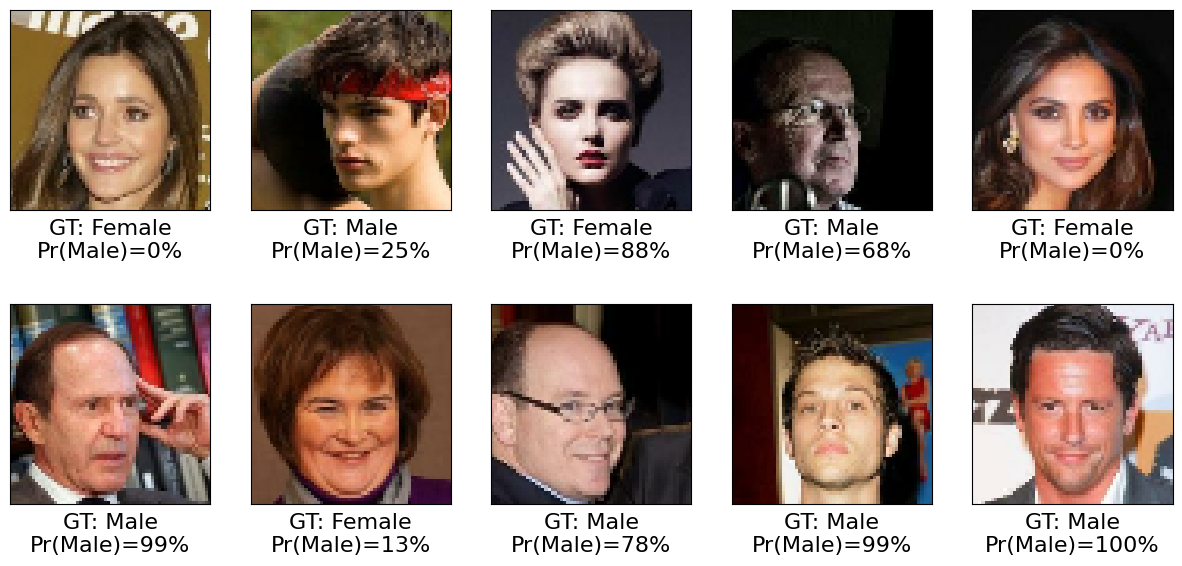

In [ ]:
import matplotlib.pyplot as plt
ds = ds_test.unbatch().take(10)

pred_logits = model.predict(ds.batch(10))
probas = tf.sigmoid(pred_logits)
probas = probas.numpy().flatten()*100

fig = plt.figure(figsize=(15, 7))
for j,example in enumerate(ds):
    ax = fig.add_subplot(2, 5, j+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    if example[1].numpy() == 1:
        label='Male'
    else:
        label = 'Female'
    ax.text(
        0.5, -0.15,
        'GT: {:s}\nPr(Male)={:.0f}%'.format(label, probas[j]),
        size=16,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)

#plt.savefig('figures/figures-15_19.png', dpi=300)
plt.show()

In [ ]:
model.save('models/celeba-cnn.keras')